## Phase 2 Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
# Load dataset
file_path = "results/benchmarking_results"
df = pd.read_csv(file_path, sep=",")

df.head(20)


,Case,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,1,1
6,7,P1,GPT-4o,1,1
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,0
9,10,P1,GPT-4o,0,0


In [3]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [4]:
# Compute **weighted** metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("llm_benchmark_evaluation_results.csv", index=False)

# Print summary
print(metrics_df)

  Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0     P1    GPT-4o       1.0     1.0000     1.0  1.000000
1     P1  Deepseek       0.9     0.9125     0.9  0.893333
2     P4    GPT-4o       0.9     0.9125     0.9  0.893333
3     P4  Deepseek       0.9     0.9125     0.9  0.893333
4     P5    GPT-4o       0.9     0.9125     0.9  0.893333
5     P5  Deepseek       1.0     1.0000     1.0  1.000000
6     P6    GPT-4o       0.9     0.9125     0.9  0.893333
7     P6  Deepseek       0.9     0.9125     0.9  0.893333


C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1070007579.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1070007579.py:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1070007579.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1070007579.py:27: UserWarning: The palette list ha

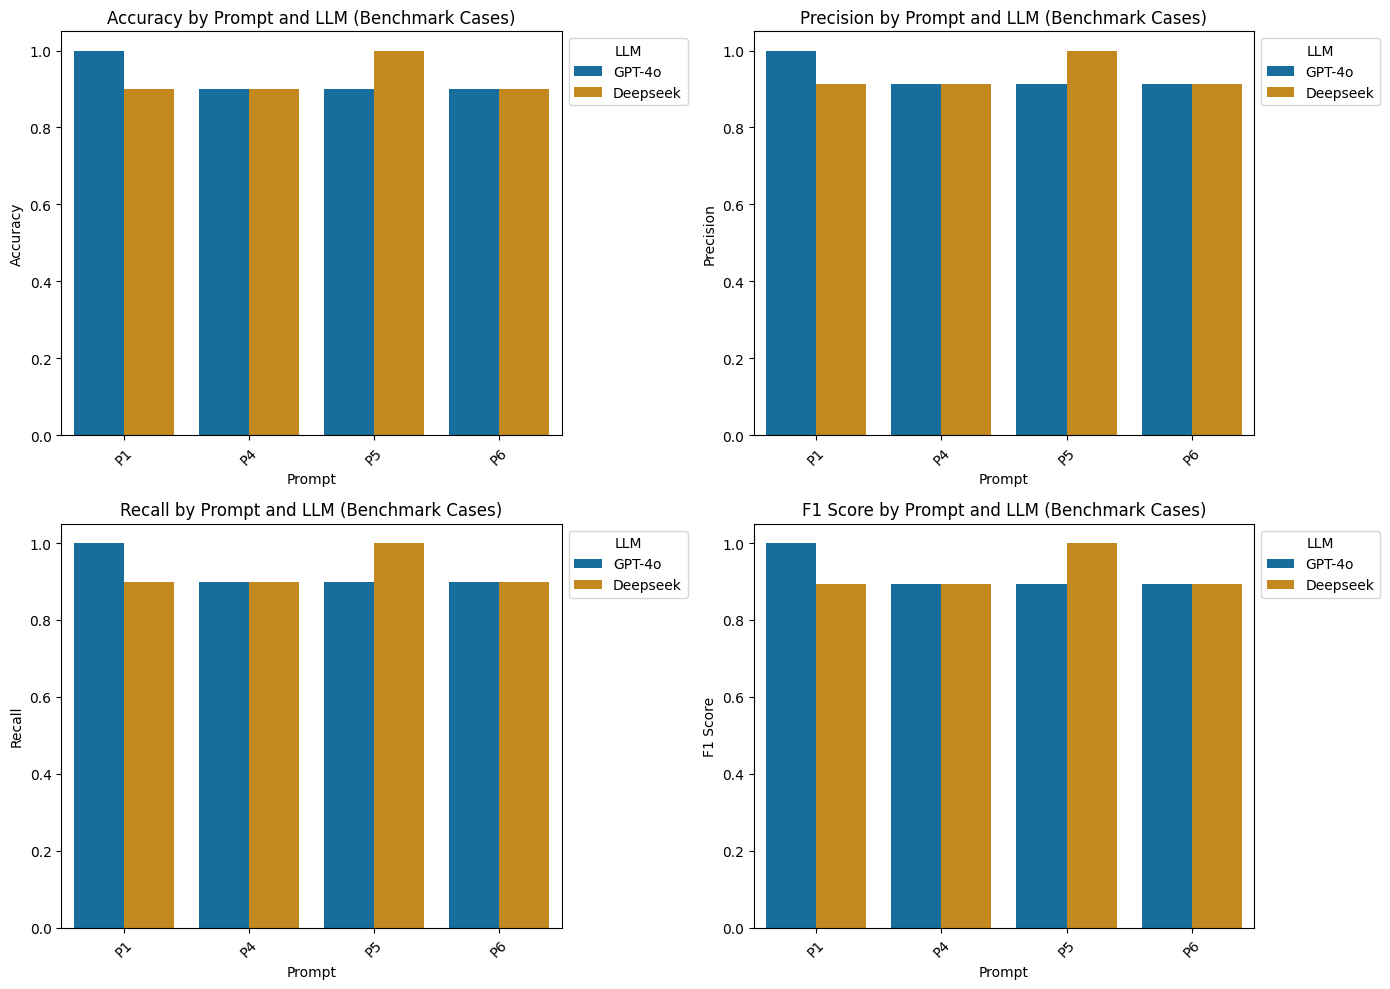

Mean scores per LLM (Benchmark Cases):
           Accuracy  Precision  Recall  F1 Score
LLM                                            
Deepseek     0.925   0.934375   0.925      0.92
GPT-4o       0.925   0.934375   0.925      0.92

Mean scores per Prompt (Benchmark Cases):
         Accuracy  Precision  Recall  F1 Score
Prompt                                       
P1          0.95    0.95625    0.95  0.946667
P4          0.90    0.91250    0.90  0.893333
P5          0.95    0.95625    0.95  0.946667
P6          0.90    0.91250    0.90  0.893333


In [5]:
# --- VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "llm_benchmark_evaluation_results.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 appears correctly after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("colorblind")  # Colorblind-friendly colors

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
    ax.set_title(f"{metric} by Prompt and LLM (Benchmark Cases)")
    ax.set_xlabel("Prompt")
    ax.set_ylabel(metric)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM (Benchmark Cases):\n", llm_means)
print("\nMean scores per Prompt (Benchmark Cases):\n", prompt_means)